# Predicting Gender and Income with Census Data
By Phu Truong, Saqib Shahzad, and Mrinmoy Bhaumik

## Business Understanding

This data set has been taken from the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Adult).

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The `Basic` task for which this dataset is created is to determine whether a person makes over 50K a year or not but according to the requirements of this lab we will also predict the `sex` as our second response variable. The task is to analyze the dataset and predict whether the income of an adult (individual) will exceed 50k per year or not and also if we can determine if an individual was `Male` or `Female`, so both of them are classification models since we will only be predicting the 'income' and the `sex`. To be more specific, these are binary classification problems because there are only two categories for each of our response variables (`<= 50K` and `>=50K` for the `income`) and (`Male` and `Female` for `sex`). Since these are classification problems, the best way to measure the effectiveness of the models would be accuracy_score and the confusion_matrix.  The reason we use the accuracy score is because it is the ratio of the number of correct predictions over the overall total number of predictions.  We also use the confusion matrix because the accuracy doesn't give us the best picture of the cost of misclassification and unbalanced test data.  It also helps us detect the false positives and and false negatives in the model[4]. 

By training a machine on this data we can then predict whether an adult (individual) makes over 50K a year or not as well as whether an individual was `Male` or `Female` by taking some important information about the individual like education level, age, gender, income, and occupation etc.

For predicting `income` gender column would be an independent variable and for predicting `sex` income would be an independent feature.

### Importing all the necessary Libraries

In [191]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [192]:
url_data = 'https://raw.githubusercontent.com/sshahzad043436/ml_of_adults_dataset/master/adults.csv'
data = pd.read_csv(url_data)

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


We can see some special characters in the start rows of this data set. The columns `workclass` and `occupation` have `?` in first and third row, and these are the missing values in our data.

Some of the columns names were separated by `.` due to which it is somehow difficult to allpy some of the pandas method on those columns like when selecting the `age` column we can do `data.age` but we cannot do the same for the `native.country` column and will give us error (example shown below) although we can use `[[ ]]` to select column(s) but we thought to rename all of our columns and replace the `.` with `_`.

In [193]:
data.age

0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64

In [194]:
data.native.country

AttributeError: 'DataFrame' object has no attribute 'native'

There is the error, we can't call columns like these who have `.` as a separator in their name with `.` operator.

In [195]:
data['native.country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native.country, Length: 32561, dtype: object

In [196]:
data.columns=[data.columns.values[0], data.columns.values[1],data.columns.values[2],data.columns.values[3],'education_num',
              'marital_status', data.columns.values[6], data.columns.values[7], data.columns.values[8],
            data.columns.values[9],'capital_gain','capital_loss','hours_per_week','native_country',data.columns.values[14]]

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Renaming all those columns where the separator is `.` in their names and replacing the `.` with `_`.

In [197]:
data.native_country

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native_country, Length: 32561, dtype: object

That problem is solve now and we can call any column now with the `.` operator.

## Data Understanding

#### 1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The following are the attributes from the data:

age: The age of the individual

workclass: It explains the employment status of the individual

fnlwgt: The number of people that this observation represents

education: Educational level of the observations

education-num: The highest education level expressed in numerical form

marital-status: Marital status of the individual

occupation: The type of occupation of the individual

relationship: This represents what the individual represents to other people

sex: Sex of the individual

capital-gain: Gains made by financial investments from the individual

capital-loss: Loss made by financial investments from the individual

hours-per-week: How many hours per week the individual works

native-country: Where the individual resides


In [198]:
print('Shape of the data: ', data.shape)

print('\nNumber of elements in the data: ', data.shape[0] * data.shape[1])

Shape of the data:  (32561, 15)

Number of elements in the data:  488415


There are `32561` rows and `15` columns in this dataset. According to the requirements, we had to choose a dataset which should have at least `450000` elements and to check that we multiplied the number of rows with number of columns to figure out the total amounts of elements in the data in the above cell and we see that it is fulfulling that requirement and we have `488415` elements in the data.

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [200]:
list(data.select_dtypes(exclude='object').columns)

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

#### These are the numerical features in our data set.

###### Ratios
1. age
2. capital_gain
3. capital_loss
4. hours_per_week
5. fnlwgt 

###### Ordinal attributes are.
1. education_num     

In [201]:
list(data.select_dtypes(include='object').columns)

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

#### These are the categorical columns in the data set.

###### Nominal Attributes in the data are:
1. marital_status
2. race
3. sex
4. native_country
5. relationship 
6. occupation
7. workclass

###### Oridinal Attributes in the data are:
1. education
2. income

#### 2. Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.

#### Missing values

In [202]:
data[data == '?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

As we have seen in the above cells, this data has some special characters which indicates that these are missing values. In the above cell the count of `?` in each attribute has been shown. We will have to replace these with `np.nan` so that we can either fill these or drop these.

In [203]:
data.replace('?', np.nan, inplace=True)
data[data == '?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

The `?` has been replaced with `np.nan` and now we have all our missing values as `NaN`.

In [204]:
# columns havind missing values
for col in data.columns:
    if data[col].isnull().any():
        print(col, '\t', data[col].isnull().sum())

workclass 	 1836
occupation 	 1843
native_country 	 583


Three columns are having missing values and they are
1. `workclass` has missing in 1836 rows
2. `occupation` has missing in 1843 rows.
3. `native_country` has missing 583 rows.

Since all the columns which has missing values(`workclass, occupation and native_country`) are categorical, so we can fill the missing values with their mode as the measure of central tendency because it is very likely that the missing values will be more closer to the mode rather than the median.

These can be either mistake or may be some people don't wanna tell about their workclass or their occupation.

In [205]:
for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].value_counts().index[0])

In [206]:
for col in data.columns:
    if data[col].isnull().any():
        print(col, '\t', data[col].isnull().sum())

No more missing values in the data.

### Duplicates

In [207]:
data.duplicated().sum()

24

In [208]:
data[data.duplicated(keep='first')].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [209]:
data[data.duplicated(keep='last')].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
8500,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K


As we can see in the above cell the rows with indices `8453` and `12202` are the exact duplicate of indices `7978` and `8356` in the below cell. This can be a mistake of the data collector or generator because it is very rare to match each and everything of two individuals.

Since these are duplicate rows and will not help in prediction as no new information is being captured in these instead the same duplicate information repeating 24 times can actually cause problems, so its better to drop them from the dataframe.

In [210]:
data = data.drop_duplicates()
data.shape

(32537, 15)

the new shape after dropping the duplicates is: `(32537, 15)`.  The previous was `(32561, 15)`.

In [211]:
print('We can now see that there are no more duplicate values:')
print('\n Sum of duplicate values: ', data.duplicated().sum())

data[data.duplicated()]

We can now see that there are no more duplicate values:

 Sum of duplicate values:  0


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


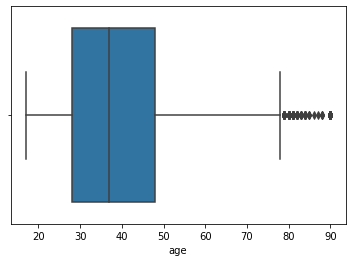

In [212]:
sns.boxplot('age', data=data)

We can see that for columns `age` any values after `78` seems to be an outlier and it is intuitive because it is very difficult to earn at this stage of the life. Removind these types of outliers can help us clean the data as well as in making good prediction.

In [213]:
data.age.quantile(0.995)

78.0

In [214]:
data = data[data.age < data.age.quantile(0.995)]

data.age.max()

77

Now the maximum `age` in this data set is `77` and that can be seen in the above cell.

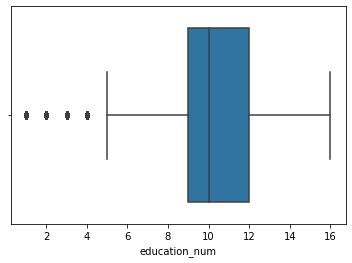

In [215]:
sns.boxplot('education_num', data=data)

Here for the `education_num` column we can see that all those adults which have education lower than 5 is an outlier but that can't be the case everytime because there may be people with no education and may be they earn very well. So we won't remove these.

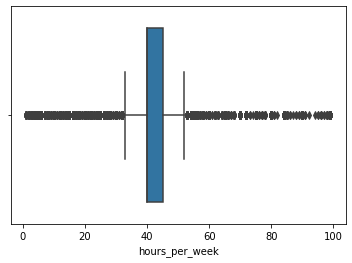

In [216]:
sns.boxplot(data.hours_per_week)

For the `hours_per_week` column, we can see that more 90 percent of the data is treated as outlier and that can't be the case.It is common sense that nobody can work 100 hours per week and is also not common to work for hours betweeen 1 and 10 per week. So for this column we would take values from 15 to 60 hours per week.

In [217]:
hpw_low = data.hours_per_week.quantile(0.04)

hpw_low

15.0

In [218]:
hpw_high = data.hours_per_week.quantile(0.93)

hpw_high

60.0

In [219]:
data = data[(data.hours_per_week > hpw_low) & (data.hours_per_week < hpw_high)]

print('Maximum value of Hours Per Week column: ' ,data.hours_per_week.max())
print('Minimum value of Hours Per Week column: ' ,data.hours_per_week.min())

Maximum value of Hours Per Week column:  59
Minimum value of Hours Per Week column:  16


As shown in the above cell, the max and the min values now for the `hours_per_week` are `59` and `16` respectively.

In [220]:
data.shape

(28463, 15)

Number of rows has been reduced now due to dropping values from the columns `age` and `hours_per_week` and now at this stage we are having `28463` rows and `15` columns.

#### 3. Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [221]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,28463.000000,2.846300e+04,28463.000000,28463.000000,28463.000000,28463.000000
mean,38.179777,1.911557e+05,10.048027,962.980325,83.998560,39.578330
std,13.023574,1.054689e+05,2.536760,6741.193169,393.872145,7.707979
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,16.000000
25%,28.000000,1.190980e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.800520e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.380050e+05,12.000000,0.000000,0.000000,40.000000
max,77.000000,1.484705e+06,16.000000,99999.000000,4356.000000,59.000000


`data.describe()` gives us the statistical description of only the `numerical columns`. But we want the statistical description for all of our columns in the data set. 

In [222]:
data.describe(include='all', percentiles=[0.1, 0.2, 0.3, 0.4 ,0.6, 0.7, 0.8, 0.9])

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,28463.000000,28463,2.846300e+04,28463,28463.000000,28463,28463,28463,28463,28463,28463.000000,28463.000000,28463.000000,28463,28463
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,21897,NaN,9410,NaN,12874,4985,11264,24147,18836,NaN,NaN,NaN,25974,21795
mean,38.179777,NaN,1.911557e+05,NaN,10.048027,NaN,NaN,NaN,NaN,NaN,962.980325,83.998560,39.578330,NaN,NaN
std,13.023574,NaN,1.054689e+05,NaN,2.536760,NaN,NaN,NaN,NaN,NaN,6741.193169,393.872145,7.707979,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,16.000000,NaN,NaN
10%,22.000000,NaN,6.851440e+04,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,30.000000,NaN,NaN
20%,26.000000,NaN,1.078628e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,37.000000,NaN,NaN
30%,29.000000,NaN,1.329150e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN


- The smallest values in `age` column is `17`while the larges value is `90`, which is intuitive because people start earning after the age of `16` and onwards and after `58` its a bit dificult to earn.  Hence, 90% of our data lies within the range of `17` to `58`. The average (mean) `age` is `38`.

- Most of the people work in `Private` industry: `24509` out of `32537`


- Out of `32537`, `24698` are earning less than `50K` a year which is the majority.

- The main portion of this data set is taken from US as it has the most values by far. 


- The mean of `education_num` column is `10.08` ('High School') and this can also be seen by looking at `education` column where the most occuring values are `HS-Grade` and is occuring `10494` out of `32567`. Hence education can be a crucial factor in determining the salary of an individual which is why it can be a good feature to keep an eye on.


- The data highlights that male are hired much more than females in terms of jobs: out of `32567` there are `21775` of rows where `sex` column is `Male` illustrating that most of the workers are male with respect to gender. Therefore, the sex column can be a very interesting and impactful variable hence a great candidate for a second class/response variable to investigate.

- Its better to drop the `fnlwgt`, `capital_gain`, and `capital_loss` columns because they are not giving any information but rather will affect the prediction cause 90 percent of data of `capital_gain`, and `capital_loss` columns are 0 and the maximums of both the columns are `99999` and `4356` respectively. So it's better to drop them.

- The two columns (`education_num` and `education`) are exactly giving same information. One column (`education_num`) is the education of an individual in numbers while `education` is the same but in string form. So we don't wanna keep the same information twice in the data, so we will drop any of these. The better option is to drop the `education` columns because the `education_num` is already in the numberical form and we won't have to convert that.

### The purpose of the percentiles is only to get a better view of the distribution of the data.

In [223]:
print('All the values of marital_status column with their count: \n')
print(data.marital_status.value_counts())

print('\n\nAll the values of marital_status column with their count: \n')
print(data.relationship.value_counts())

All the values of marital_status column with their count: 

Married-civ-spouse       12874
Never-married             9413
Divorced                  4044
Separated                  945
Widowed                    794
Married-spouse-absent      376
Married-AF-spouse           17
Name: marital_status, dtype: int64


All the values of marital_status column with their count: 

Husband           11264
Not-in-family      7347
Own-child          4353
Unmarried          3196
Wife               1411
Other-relative      892
Name: relationship, dtype: int64


The cell above clarifies that in a marriage, the husband works much more `(11264)` while the wives work much less `(1411)`. 

#### 4. Visualize the most important attributes appropriately (at least 5 attributes).

Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

#  ONE COLUMN AT A TIME

In [224]:
numerical_features = data.select_dtypes(exclude='object')

numerical_features.dtypes

age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

Storing all the numerical features in a DataFrame by the name of `numerical_features` because we don't want the `categorical_features` to be there when we wanna plot only the `numerical` ones.

In [225]:
categorical_features = data.select_dtypes(include='object')

categorical_features.dtypes

workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
income            object
dtype: object

Storing all the categorical features in a DataFrame by the name of `categorical_features` because we don't want the `numerical_features` to be there when we wanna plot only the `categorical` ones.

In [226]:
len(numerical_features.columns) + len(categorical_features.columns) == len(data.columns)

True

We can see that the sum lengths of columns of `numerical_features` and `categorical_features` is equal to the length of the whole data.

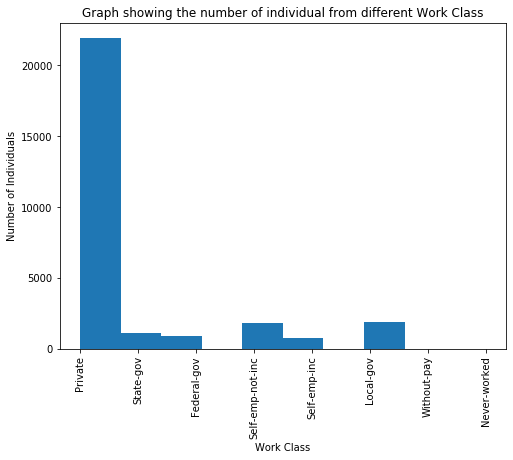

In [227]:
plt.figure(figsize=(8, 6))

plt.hist(categorical_features.workclass)
plt.ylabel('Number of Individuals')
plt.xlabel('Work Class')
plt.title('Graph showing the number of individual from different Work Class')
plt.xticks(rotation=90)
plt.show()

Almost 80% of adults in the data set are classified as Private work class. Thus, work class is too generic and not an ideal factor for classifying income and sex.

In [228]:
categorical_features.education = data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th',],
                                                            'School')

categorical_features.education.unique()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Some-college', 'School', 'HS-grad', 'Doctorate', 'Prof-school',
       'Bachelors', 'Masters', 'Assoc-acdm', '11th', 'Assoc-voc', '12th'],
      dtype=object)

Combining `Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, and 10th` to a single variable `School` to get a better view of all the individuals in the graph.

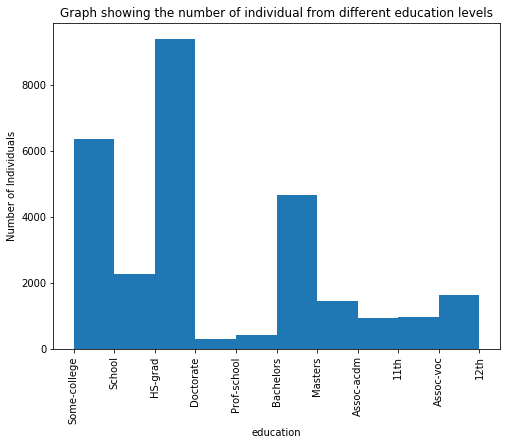

In [229]:
plt.figure(figsize=(8, 6))

plt.hist(categorical_features.education)
plt.ylabel('Number of Individuals')
plt.xlabel('education')
plt.title('Graph showing the number of individual from different education levels')
plt.xticks(rotation=90)
plt.show()

Most of adult are Highschool graduates or College students in the dataset.

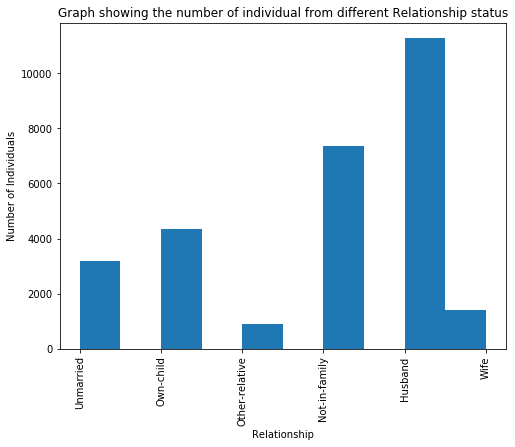

In [230]:
plt.figure(figsize=(8, 6))

plt.hist(categorical_features.relationship, density=False)
plt.ylabel('Number of Individuals')
plt.xlabel('Relationship')
plt.title('Graph showing the number of individual from different Relationship status')
plt.xticks(rotation=90)
plt.show()

Relationship status graph shows majority of adults are either `Husband` or under `not-in-family` status and most of the individuals that are married  are `Husband`.

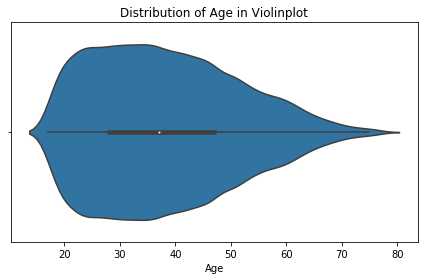

In [231]:
sns.violinplot('age', data=numerical_features)
plt.xlabel('Age')
plt.title('Distribution of Age in Violinplot')
plt.tight_layout()
plt.show()

Most of the people's ages in our data are in between 20 and 50, that is why the width of the above voilinplot is very larger which indicates that the values from 20 to 50 are the most occuring ones.

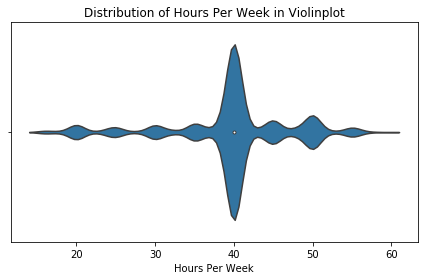

In [232]:
sns.violinplot(x='hours_per_week', data=numerical_features)
plt.xlabel('Hours Per Week')
plt.title('Distribution of Hours Per Week in Violinplot')
plt.tight_layout()
plt.show()

There is a large variance in the hours-per-week attribute ranging from less than 20 to over 60. Most of the data points concentrate around 40 hours.

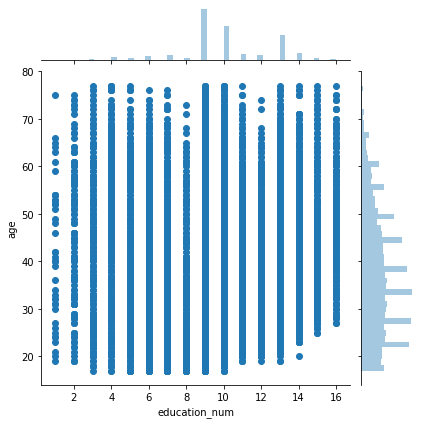

In [233]:
sns.jointplot(x='education_num', y='age', data=data)

This education_num plot shows that most of the adults has an index between 8 to 10 and 13 as we look at the density of data points illustrated by the tiny bars on top. 

In [234]:
#data['age'] = pd.cut(data['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

#### 5. Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

First, we take a look at the correlation table for between attributes below. We can see that most of the correlation coefficients are less than 0.1, which means there are no significant correlations between the attributes. Thus, we assume multicollinearity is absent between variables in this case.

In [235]:
correlation = data.corr()

correlation

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.075306,0.031150,0.081406,0.055908,0.117077
fnlwgt,-0.075306,1.000000,-0.048148,-0.005956,-0.010253,-0.014060
education_num,0.031150,-0.048148,1.000000,0.107801,0.074986,0.148723
capital_gain,0.081406,-0.005956,0.107801,1.000000,-0.030466,0.065904
capital_loss,0.055908,-0.010253,0.074986,-0.030466,1.000000,0.051870
hours_per_week,0.117077,-0.014060,0.148723,0.065904,0.051870,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcab1e0810>,
      dtype=object)

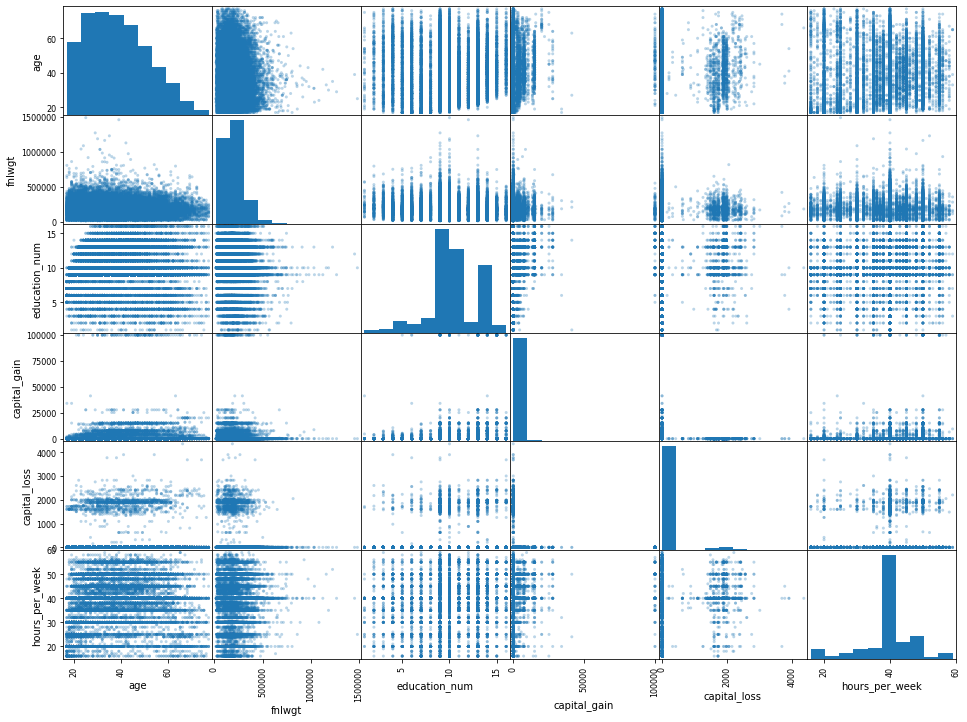

In [236]:
scatter_matrix(data,figsize=(16,12), alpha=0.3)

The correlation matrix only shows random clouds and clusters of data points, so we conclude that the attributes are not significantly affecting each other.

In [237]:
pd.crosstab(data.sex,data.income,margins=True)

income,<=50K,>50K,All
sex,,,
Female,8562,1065,9627
Male,13233,5603,18836
All,21795,6668,28463


For both income groups, the number of males are more than numbers of females. However, the sex ratios distributed between <=50k and >50k group, calculated as: 
for <=50k , male/female= 15128/9592 ~ 1.5
for >50k , male/female =6662/1179 ~ 5.6
This proves the existence in income inequality between genders. 


In [238]:
pd.crosstab(data.education,[data.sex,data.income],margins=True)

sex          Female         Male          All
income        <=50K  >50K  <=50K  >50K       
education                                    
10th            242     3    490    51    786
11th            342     7    571    45    965
12th            127     4    236    24    391
1st-4th          38     0    105     5    148
5th-6th          70     2    218    12    302
7th-8th         134     1    379    29    543
9th             125     5    324    20    474
Assoc-acdm      327    51    383   187    948
Assoc-voc       393    61    526   261   1241
Bachelors      1141   310   1615  1612   4678
Doctorate        23    35     49   194    301
HS-grad        2923   213   5042  1232   9410
Masters         319   159    334   639   1451
Preschool        14     0     29     0     43
Prof-school      40    35     75   276    426
Some-college   2304   179   2857  1016   6356
All            8562  1065  13233  5603  28463

The table between sex and education above implies that on average males have higher education than females in the dataset.
For instance, the number of males who have a bachelor degree and make >50k income is significantly higher than that of females in the same category (1882 > 339). It is noticed that the same scenario happens for other education backgrounds as well.
In spite of that, we need keep in mind that there is more males than females (twice as much) in this dataset.

In [239]:
pd.crosstab(data.education,[data.occupation,data.income],margins=True)

occupation   Adm-clerical      Armed-Forces      Craft-repair       \
income              <=50K >50K        <=50K >50K        <=50K >50K   
education                                                            
10th                   35    0            0    0          137   17   
11th                   49    3            0    0          146   16   
12th                   34    1            1    0           46    8   
1st-4th                 0    0            0    0           21    2   
5th-6th                 6    0            0    0           38    3   
7th-8th                 8    1            0    0           99    6   
9th                    12    1            0    0           85    7   
Assoc-acdm            151   28            0    0           77   29   
Assoc-voc             141   18            0    0          161   76   
Bachelors             362  116            1    0          121   78   
Doctorate               3    2            0    0            1    0   
HS-grad              1145  155            3    0         1415  372   
Masters                42   21            0    1            8   10   
Preschool               2    0            0    0            3    0   
Prof-school             5    4            0    0            0    5   
Some-college         1027  136            1    0          571  214   
All                  3022  486            6    1         2929  843   

occupation   Exec-managerial       Farming-fishing       ... Prof-specialty  \
income                 <=50K  >50K           <=50K >50K  ...           >50K   
education                                                ...                  
10th                      14     5              35    0  ...              2   
11th                      21     7              28    2  ...              2   
12th                      10     2              14    0  ...              4   
1st-4th                    1     1              11    1  ...              0   
5th-6th                    0     0              34    0  ...              1   
7th-8th                   10     5              50    2  ...              2   
9th                        9     2              24    1  ...              1   
Assoc-acdm                69    58              11    2  ...             39   
Assoc-voc                 79    56              22    5  ...             64   
Bachelors                520   666              39   12  ...            556   
Doctorate                  4    40               0    1  ...            180   
HS-grad                  478   216             262   24  ...             93   
Masters                  116   288               2    1  ...            388   
Preschool                  0     0               7    0  ...              0   
Prof-school               12    33               2    0  ...            254   
Some-college             484   256              92   15  ...            136   
All                     1827  1635             633   66  ...           1722   

occupation   Protective-serv      Sales      Tech-support       \
income                 <=50K >50K <=50K >50K        <=50K >50K   
education                                                        
10th                       5    0    55    4            1    1   
11th                       4    2   102    5            6    0   
12th                       6    0    35    4            2    1   
1st-4th                    1    0     6    0            0    0   
5th-6th                    1    0     7    3            0    0   
7th-8th                    4    0    20    4            4    0   
9th                        3    0    26    4            2    0   
Assoc-acdm                20   12    85   35           50   17   
Assoc-voc                 27   15    67   23           81   36   
Bachelors                 39   46   363  309          143   76   
Doctorate                  0    0     1    4            2    1   
HS-grad                  156   42   778  156          106   43   
Masters                    7

This cross-table helps to navigate the number of adults in each income group base on their occupations and education status.

In [240]:
pd.crosstab(data.education,[data.occupation,data.sex],margins=True)

occupation   Adm-clerical       Armed-Forces Craft-repair        \
sex                Female  Male         Male       Female  Male   
education                                                         
10th                   21    14            0           11   143   
11th                   36    16            0            8   154   
12th                   22    13            1            1    53   
1st-4th                 0     0            0            2    21   
5th-6th                 3     3            0            3    38   
7th-8th                 2     7            0            3   102   
9th                     7     6            0            5    87   
Assoc-acdm            124    55            0            7    99   
Assoc-voc             118    41            0           11   226   
Bachelors             252   226            1           14   185   
Doctorate               1     4            0            0     1   
HS-grad               926   374            3          100  1687   
Masters                28    35            1            2    16   
Preschool               1     1            0            0     3   
Prof-school             2     7            0            0     5   
Some-college          813   350            1           45   740   
All                  2356  1152            7          212  3560   

occupation   Exec-managerial       Farming-fishing      Handlers-cleaners  \
sex                   Female  Male          Female Male            Female   
education                                                                   
10th                       7    12               4   31                 8   
11th                      11    17               2   28                12   
12th                       2    10               1   13                 3   
1st-4th                    0     2               0   12                 1   
5th-6th                    0     0               2   32                 2   
7th-8th                    1    14               6   46                 4   
9th                        5     6               1   24                 4   
Assoc-acdm                51    76               1   12                 1   
Assoc-voc                 50    85               2   25                 5   
Bachelors                300   886               3   48                 3   
Doctorate                 11    33               0    1                 0   
HS-grad                  252   442              14  272                83   
Masters                   92   312               0    3                 0   
Preschool                  0     0               0    7                 1   
Prof-school                8    37               0    2                 0   
Some-college             264   476              17   90                23   
All                     1054  2408              53  646               150   

occupation    ... Prof-specialty Protective-serv       Sales        \
sex           ...           Male          Female Male Female  Male   
education     ...                                                    
10th          ...             50               2    3     33    26   
11th          ...             51               1    5     66    41   
12th          ...             28               0    6     25    14   
1st-4th       ...             10               0    1      1     5   
5th-6th       ...             16               0    1      3     7   
7th-8th       ...             39               0    4      4    20   
9th           ...             26               1    2     15    15   
Assoc-acdm    ...             78               1   31     38    82   
Assoc-voc     ...             87               5   37     28    62   
Bachelors     ...            893              12   73    142   530   
Doctorate     ...            197               0    0      1     4   
HS-grad       ...            343              22  176    395   539   
Masters       ...            457               0   12     17    90  

This cross-table helps to navigate the number of males and females base on their occupations and education status.

In [241]:
g1=data.groupby('income')
g2=data.groupby('sex')

In [242]:
g1.mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
income,,,,,,
<=50K,36.371003,191985.802478,9.586969,144.031016,52.705070,38.562423
>50K,44.091932,188442.487852,11.555039,3639.794991,186.284343,42.898920


We can see that on average, the >50k income group is about 8 years older than <=50k income group. And the average population (fnlwgt) of the >50k income group is just a little less than the <=50k income group. Their average capital gain and education are also higher. The average hours per week difference is about 7 hours per week longer for the >50k income group.

In [243]:
g2.mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
sex,,,,,,
Female,36.616080,186298.535369,10.039368,581.330736,59.205048,37.198504
Male,38.978976,193638.196751,10.052453,1158.039817,96.670418,40.794649


We found it is very interesting that the average education level is the same for both males and females while the male’s capital gain is much higher. Males appear to work more hours per week than females and they are about 3 years older than females on average. 


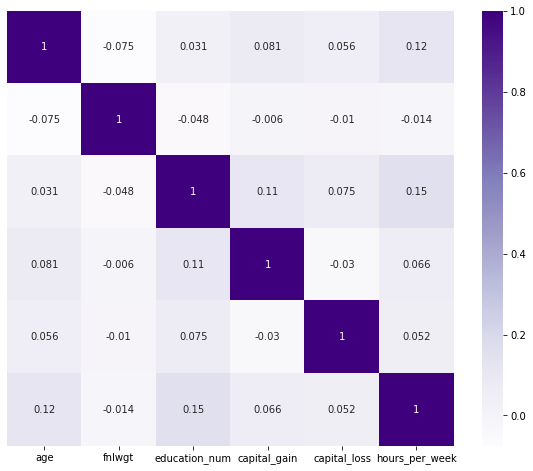

In [244]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, yticklabels=False, cmap='Purples')

This heatmap shows there is little to none correlation between attributes due to majority of the boxes are light-colored. Since the correlation of `capital_gain`, `capital_loss`, and `fnlwgt` are negative with many of the other attributes, so it's better to drop them from the dataset.

In [245]:
data = data.drop(['capital_gain', 'capital_loss', 'fnlwgt'], axis=1)

data.shape

(28463, 12)

Now after dropping the above columns (`capital_gain`, `capital_loss`, and `fnlwgt`) the shape of the data is (`28463,12`).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

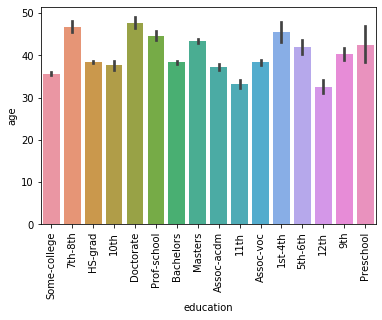

In [246]:
sns.barplot(x='education',y='age', data=data)
plt.xticks(rotation=90)

From the graph above we can see that there is a relation between the `ages` of `Doctorate, Prof-scholl, Masters, and Bachelor`. The ages are in an order (Doctorate, Prof-School, Masters, and then Bachelors)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

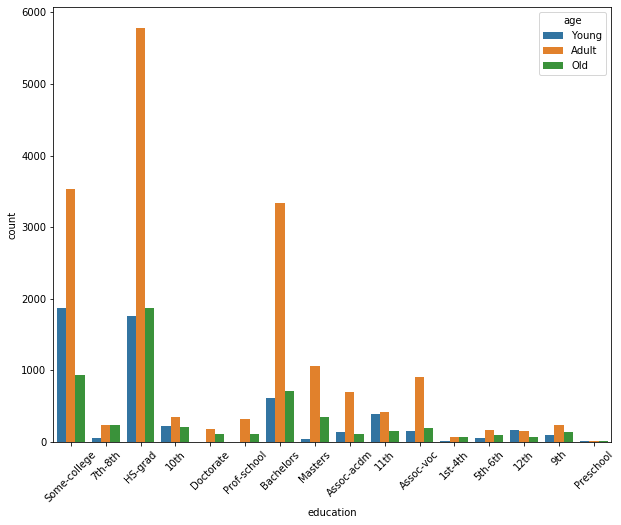

In [247]:
plt.figure(figsize=(10,8))

sns.countplot(x='education', hue=pd.cut(data['age'], bins=[0, 25, 50, 100], labels = ['Young', 'Adult', 'Old']), data = data)
plt.xticks(rotation=45)

From the graph above, we can clearly see that in all the education phases the number of adults are much more than the young and old ones which is intuitive. Young onces can't be either in the `Doctorate` or `Prof-school education` because they are too young for that and this can be seen in the graph above although there are some young ones in the `Bachelors`, `Masters`, `Assoc-acdm (12)`, and `Assoc-voc (11)`.

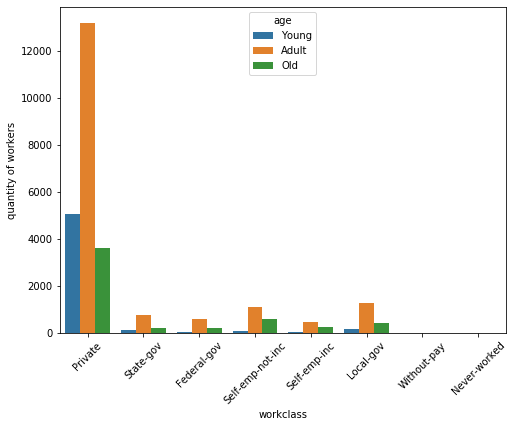

In [248]:
plt.figure(figsize=(8, 6))

sns.countplot(x='workclass', hue=pd.cut(data['age'], bins=[0, 25, 50, 100],
                                        labels = ['Young', 'Adult', 'Old']), data=categorical_features)
plt.xticks(rotation=45)
plt.ylabel('quantity of workers')
plt.show()

The graph above tells us that in all of the work classes, the highest number of workers are adults. There is another very interesting information which is that in the `Without-pay` and `Never-worked` thereare are close to zero adults if not none.

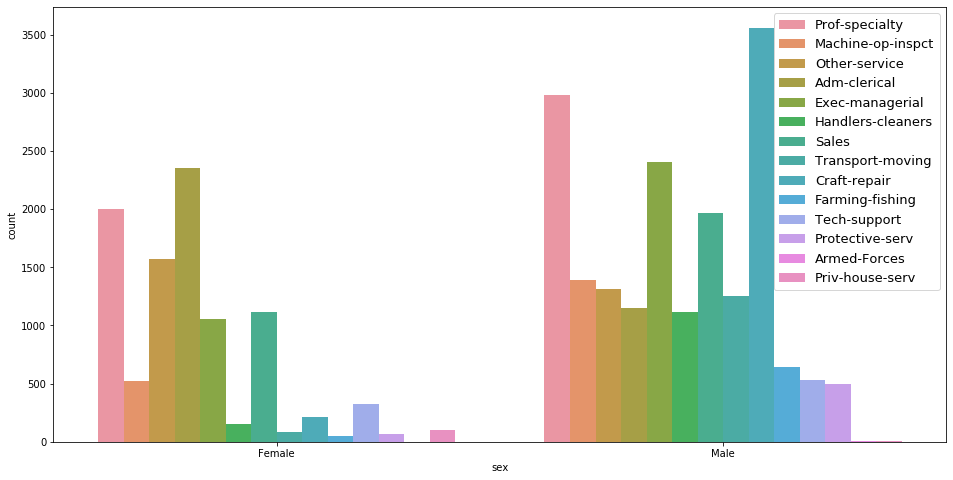

In [249]:
plt.figure(figsize=(16,8))

sns.countplot(x = 'sex', hue = 'occupation', data = categorical_features)
plt.legend(loc='best', fontsize=13)

Occupation also works as a great factor in identifying `sex`. According to the bar plot above, we notice that there are significant differences in numbers of `male` and `females` for some occupations. For instance, `Ex-managerial`, `Machine-op-inspct`, `Craft-repair`, `Transport-moving` adults are most likely males in the dataset.

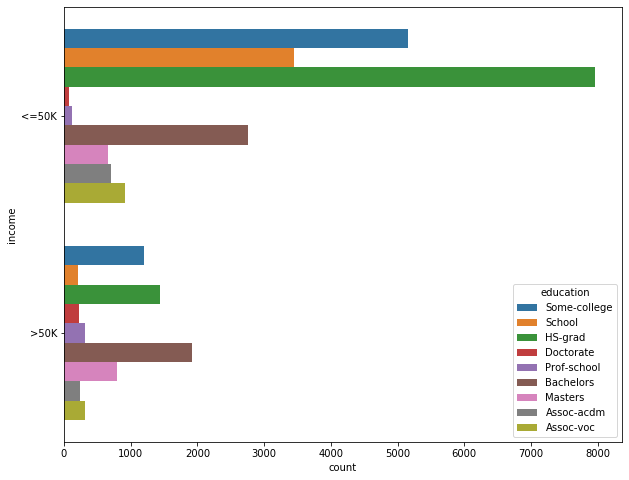

In [250]:
plt.figure(figsize=(10,8))

sns.countplot(y='income',hue=data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th' ],
                                                            'School'), data = categorical_features)

In the above graph we can see that the majority of the individuals (education wise) are `HS-Grad`, `some-college`, `School`, and some `Bachelors` as well who earn less that 50K a year, and thats true. But in the greater that 50K a year category the majority is of `Bachelors`, `Masters`, and some `HS-grad`. `Bachelors` and `Masters` are most likely to earn more than 50K.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

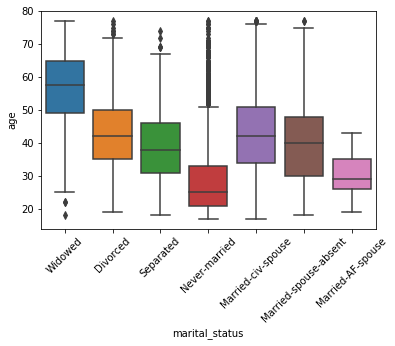

In [251]:
sns.boxplot(x='marital_status',y='age', data=data)
plt.xticks(rotation=45)

From the above graph we can see that the ages of the majority of the individuals that are widowed are from 50 to 65, which is true in real life. And also the ages of the individuals that are `Never-married` are from 20 to about 33 or 35 and that is also true because people usually get married in the ages between 20 to 30.

This plot helps to visualize the relationship between capital gain and hours per week for different education backgrounds. We notice that there is a small cluster outlying data points around 100,000 capital gain has a darker color tone then the rest of the data. However there is no apparent relationship between these attributes.

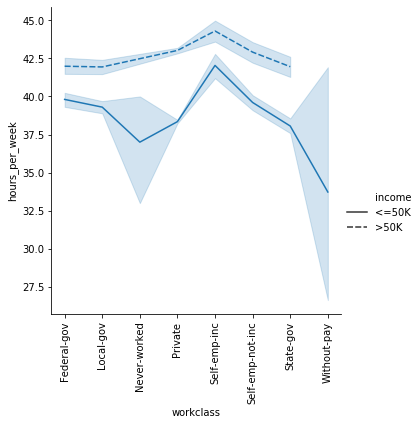

In [252]:
sns.relplot(x="workclass", y="hours_per_week", data=data, kind="line",style='income')
plt.xticks(rotation=90)
plt.show()

The graph indicates that those who earn more than 50K a year work more hours per week than those who don't. 
Self-employed adults (inc and not-inc) has more hours per week than the rest of work classes for both income groups.

#### 6. Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

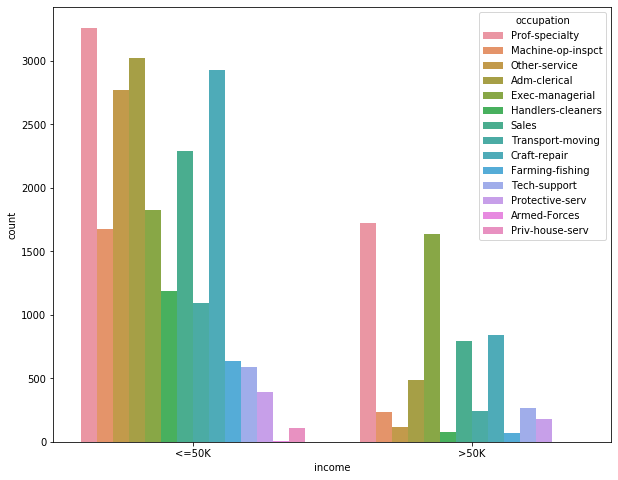

In [253]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = 'occupation', data = categorical_features)

We can see from the graph above that the majority of the individuals occupation wise are `Prof-speciality`, `Adm-clercial`, `Craft-repair`, and `Other- sevice`, while the majorit of the individuals in greater than 50K category are `Prof-speciality`, `Exec-managerial` and some `Sales` and `Craft-repair` as well. It is common sence that `adults` with occupation `Prof-specialty` and `Exec-managerial` are most likey to earn more than 50K. 
On the other hand, the <=50k income group is equally made of different occupations in terms of counts.  So none of them really stands out. Therefore, the two occupations (‘Prof-specialty’ and ‘Exec-managerial’) are strong factors in identifying if an adult belongs to higher income groups.  

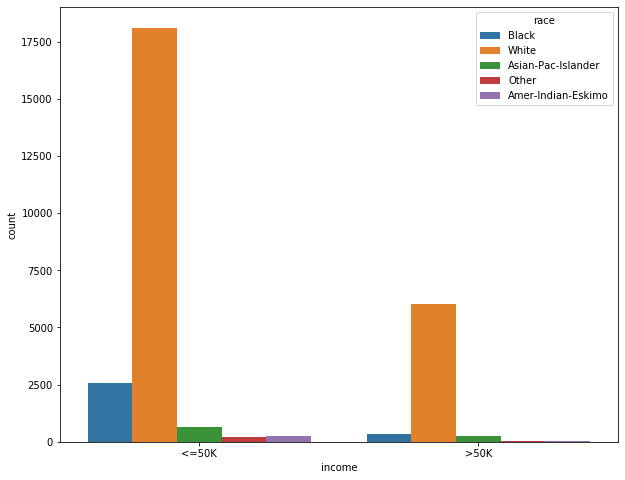

In [254]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = 'race', data = categorical_features)

As we can see the number of `White` people is much larger in both categories and they are earning more than the people from other races. The reason for this can be that most of the data is from US where more white adults are surveyed and collected in the data set.

In [255]:
categorical_features.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [256]:
data.native_country.value_counts().head()

United-States    25974
Mexico             589
Philippines        181
Germany            118
Puerto-Rico        105
Name: native_country, dtype: int64

In [257]:
# Number of countries other than United-States
len(data.native_country.unique()) - 1

40

In [258]:
len(data[data.native_country != 'United-States'])

2489

Out of 28463 individuals, 25974 of them are from `United-States` and only `2489` are from `40` different countries. The sum of all the individuals that are not in `United-States` is `2489` which very very much low as compared to `25974` which are from US. That is why we combined all those who aren't from US to compare it with those whor are from US.

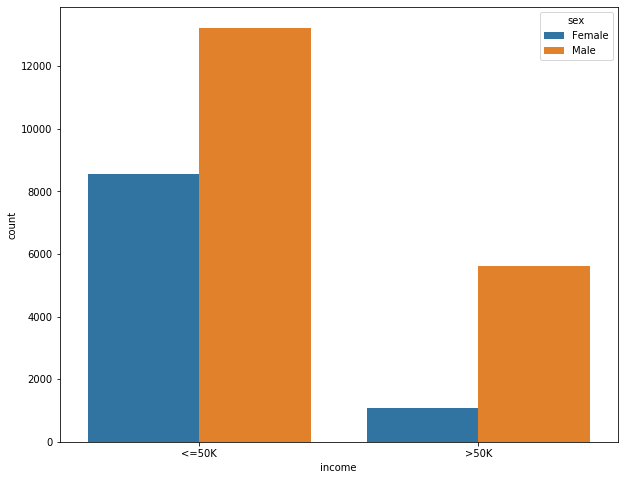

In [259]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = 'sex', data = categorical_features)

Males are earning more than the females in both category (<=50K as well as >50K). as we can see that men are more likely to earn as compared to women. also the amount men earning more than 50K is very high than that of women. 

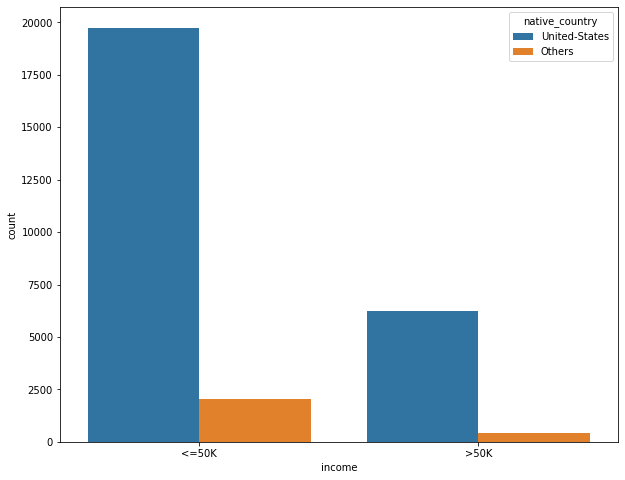

In [260]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = data['native_country'].replace(['Mexico', 'Greece', 'Vietnam', 'China',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Japan', 'Hong', 'Taiwan', 'India', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Columbia', 'Guatemala', 'Cuba', 'Jamaica', 'Italy',
       'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Ecuador', 'Laos',
       'Hungary', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Thailand'], 'Others',), data = categorical_features)

In both of the category whether less than 50K or greater than 50K, the US citizens are much larger in number from the adults of other countries. There are almost 2500 adults from other countries who earn less than 50K which is a very small number and this is even very low in the greater than category.

#### 7. Are there other features that could be added to the data or created from existing features? Which ones?

There should be a feature by the name of number_of_children to show the number of childrens because # of children can also be a factor. There is statistical evidence provided by The Annie E.Casey Foundation Data Center to show that more kids live in low-income families than high-income families [1]. Therefore, this feature can help with income group classification (>50k or <=50k). As for sex classification, we can add features such as skull size or teeth size, which is used in dental forensic science [2]. Males are proven to have larger skull size and teeth size than females.

#### 8. Exceptional Work (10 points total)
- You have free reign to provide additional analyses.
- One idea: implement dimensionality reduction, then visualize and interpret the results.

#### Implementing Random Forest and Logistic Regression with GridSearchCV and making predictions.

In [261]:
data.drop('education', axis=1, inplace=True)
data.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

We have two different columns with same kind of information, `education_num` and `education`. `education` has the values of the education of the adults in string form while `education_num` have those values in integer form. So it is better to have only one of them and drop the other one because we don't want our data to be duplicate. We are going to drop `education` because the `education_num` is already in integer form so we won't need to convert it to numerical column as it is already there.

In [262]:
data.income = data.income.replace({'<=50K': 0, '>50K': 1})
income = data['income']

income.value_counts()

0    21795
1     6668
Name: income, dtype: int64

Replacing the `income` column with `0s` and `1`, `0` for `<=50K` and `1` for `>50K`, and also making a series of `income` column and and storing it to be used in predicting it.

In [263]:
data.sex = data.sex.replace({'Female': 0, 'Male': 1})
sex = data['sex']

sex.value_counts()

1    18836
0     9627
Name: sex, dtype: int64

Replacing the `sex` column with `0s` and `1s`, `0` for `female` and `1` for `male`, and also making a series of `sex` column and and storing it to be used in predicting it. 

In [264]:
numerical_features = data.select_dtypes(exclude='object')

numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28463 entries, 2 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             28463 non-null  int64
 1   education_num   28463 non-null  int64
 2   sex             28463 non-null  int64
 3   hours_per_week  28463 non-null  int64
 4   income          28463 non-null  int64
dtypes: int64(5)
memory usage: 2.6 MB


Storing all our numerical features in `numerical_features` so that we can apply some normalization or standardization technique on these columns only.

In [265]:
copy_numerical_features = numerical_features.copy()

copy_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28463 entries, 2 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             28463 non-null  int64
 1   education_num   28463 non-null  int64
 2   sex             28463 non-null  int64
 3   hours_per_week  28463 non-null  int64
 4   income          28463 non-null  int64
dtypes: int64(5)
memory usage: 1.3 MB


Making a copy of `numerical_features` so that we can it while prediciting the second response variable (`sex`).

In [266]:
categorical_features = data.select_dtypes(include='object')

categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28463 entries, 2 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       28463 non-null  object
 1   marital_status  28463 non-null  object
 2   occupation      28463 non-null  object
 3   relationship    28463 non-null  object
 4   race            28463 non-null  object
 5   native_country  28463 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


Storing all our categorical features in `categorical_features` so that we can apply One Hot Encoding on these columns only.

#### Predicting the `income`.

In [267]:
numerical_features = numerical_features.drop('income', axis=1)

numerical_features.columns

Index(['age', 'education_num', 'sex', 'hours_per_week'], dtype='object')

For predicting the income of of an individual, we have to drop the `income` column (1st response variable) so that we can split our data into features and labels associated with them.

In [270]:
categorical_features.native_country = data['native_country'].replace(['Mexico', 'Greece', 'Vietnam', 'China',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Japan', 'Hong', 'Taiwan', 'India', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Columbia', 'Guatemala', 'Cuba', 'Jamaica', 'Italy',
       'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Ecuador', 'Laos',
       'Hungary', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Thailand'], 'Others')

Out of `28463` individuals, `25974` of them are from `United-States` and only `2489` are from `40` other different countries. The sum of all the individuals that are not in `United-States` is `2489` which very very much low as compared to `25974` which are from US. That is why we combined all those who aren't from US to compare it with those who are from US. If we didn't do this then after one hot encoding we will get so many columns from only one column, that is why it is better to combine all other countries and rename it as `Others`.

In [271]:
one_hot_encoded = pd.get_dummies(categorical_features)
one_hot_encoded.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Divorced,marital_status_Married-AF-spouse,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Others,native_country_United-States
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
5,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
6,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In the above cell we have applied One Hot Encoding on all the `categorical_features` and now we have `42` catergorical columns.

In [272]:
full_data = pd.concat([numerical_features, one_hot_encoded, income], axis=1)

full_data.head()

,age,education_num,sex,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Others,native_country_United-States,income
2,66,10,0,40,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,54,4,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,41,10,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,34,9,0,45,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
6,38,6,1,40,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


Combining all the three dataframes `numerical_features`, `one_hot_encoded`, and `income` (1st response variable) into a single dataframe `full_data`. This is the final data that we have after one hot encoding and combining the three of them.

In [273]:
full_data.columns

Index(['age', 'education_num', 'sex', 'hours_per_week',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_

In [274]:
y = full_data.income
x = full_data.drop('income', axis=1)

spliting the full_data into x (`features`) and y (`labels`) so that we can split it into training and testing.

In [275]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Spliting the `features` and `labels` into `xtrain`, `xtest`, `ytrain`, and `ytest` to make it ready for the machine learning to be trained on and then make predictions on.

In [276]:
ytrain.value_counts()

0    15256
1     4668
Name: income, dtype: int64

In [277]:
scaler = MinMaxScaler()

scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.transform(xtest)

Implementing the MinMaxScaler on both the xtrain and xtest to get all the values in same range 

In [278]:
scaled_xtrain

array([[0.28333333, 0.8       , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.76666667, 0.53333333, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.11666667, 0.53333333, 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.05      , 0.6       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.13333333, 0.8       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18333333, 0.6       , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [279]:
scaled_xtest

array([[0.11666667, 0.53333333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.1       , 0.6       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.35      , 0.53333333, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.03333333, 0.6       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.06666667, 0.6       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.08333333, 0.6       , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [280]:
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)

Intantiating both Logistic Regression and Random Forest.

In [283]:
log_reg.fit(scaled_xtrain, ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fitting the Logistics Regression to the training data (`scaled_xtrain` and `ytrain`)

In [284]:
random_forest.fit(scaled_xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Fitting the Random Forest to the training data (`scaled_xtrain` and `ytrain`)

In [285]:
log_reg_pred = log_reg.predict(scaled_xtest)

random_forest_pred = random_forest.predict(scaled_xtest)

Storing the predictions made by each classifier in two different variables, `log_reg_pred` for Logistic and `random_forest_pred` for Random Forest

In [286]:
print('Logistic Regression Predictions:', log_reg_pred)

print('\nRandom Forest Predictions:' ,random_forest_pred)

Logistic Regression Predictions: [0 0 0 ... 0 0 0]

Random Forest Predictions: [0 0 0 ... 0 0 0]


In [287]:
print('Accuracy score of Logistic Regression: ', metrics.accuracy_score(ytest, log_reg_pred))

print('\nAccuracy score of Random Forest: ', metrics.accuracy_score(ytest, random_forest_pred))

Accuracy score of Logistic Regression:  0.8400281063356365

Accuracy score of Random Forest:  0.8265604871764843


In [288]:
print('Confusion Matrix of Logistic Regression: \n', metrics.confusion_matrix(ytest, log_reg_pred))

print('\nConfusion Matrix of Random Forest: \n', metrics.confusion_matrix(ytest, random_forest_pred))

Confusion Matrix of Logistic Regression: 
 [[6051  488]
 [ 878 1122]]

Confusion Matrix of Random Forest: 
 [[6272  267]
 [1214  786]]


The logistic regression model's accuracy was 84.00, while the accuracy of Random Forest was 82.65 while predicting the income of the individual, hence the logistic regression performed slightly better than the random forest.

We are now going to predict an individual class by giving all the values of the predictors or independent variables to both the algorithms and will check what we get.

`age` = 34

`education_num` = 13,

`sex` = Male

`hours_per_week` = 45

`workclass` = Self-emp-inc

`marital_status` = Married-civ-spouse

`occupation` = Sales

`relationship` = Husband

`race` = White

`native_country` = Others

In [289]:
for i, c in enumerate(xtrain.columns):
    print(i+1, c)

1 age
2 education_num
3 sex
4 hours_per_week
5 workclass_Federal-gov
6 workclass_Local-gov
7 workclass_Never-worked
8 workclass_Private
9 workclass_Self-emp-inc
10 workclass_Self-emp-not-inc
11 workclass_State-gov
12 workclass_Without-pay
13 marital_status_Divorced
14 marital_status_Married-AF-spouse
15 marital_status_Married-civ-spouse
16 marital_status_Married-spouse-absent
17 marital_status_Never-married
18 marital_status_Separated
19 marital_status_Widowed
20 occupation_Adm-clerical
21 occupation_Armed-Forces
22 occupation_Craft-repair
23 occupation_Exec-managerial
24 occupation_Farming-fishing
25 occupation_Handlers-cleaners
26 occupation_Machine-op-inspct
27 occupation_Other-service
28 occupation_Priv-house-serv
29 occupation_Prof-specialty
30 occupation_Protective-serv
31 occupation_Sales
32 occupation_Tech-support
33 occupation_Transport-moving
34 relationship_Husband
35 relationship_Not-in-family
36 relationship_Other-relative
37 relationship_Own-child
38 relationship_Unmarrie

In [290]:
log_reg.predict([[34, 13, 1,  45, 0, 0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0]])

array([1])

In [291]:
random_forest.predict([[34, 13, 1,  45, 0, 0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0]])

array([1])

Both of the algorithms predicted that the above individual will earn more that 50K a year because the individual is highly qualified (13), works 45 hours per week, is married, is Male, and is self employed (owns a business or an entrepreneur).

Let's make another prediction where the individual is:

`age` = 19

`education_num` = 10

`hours_per_week` = 25

`workclass` = Private

`marital_status` = Never-married

`occupation` = Transport-moving

`relationship` = Own-child

`race` = White

`sex` = Male

`native_country` = United States

In [292]:
random_forest.predict([[19, 10, 1, 25, 0, 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1, 1,  0]])

array([0])

The prediction for the second individual is that this individual will earn less that 50K a year and it seems true because he/she is not highly qualified, doesn't work many hours per week and the occupation is also not that good. 

#### Predicting the second response variable (`Sex`)

In [294]:
copy_numerical_features.drop('sex', axis=1, inplace=True)

copy_numerical_features.columns

Index(['age', 'education_num', 'hours_per_week', 'income'], dtype='object')

Now we will be using that `copy_numerical_features` to predict the second response variable (`sex`).

In [295]:
full_data = pd.concat([copy_numerical_features, one_hot_encoded, sex], axis=1)

full_data.head()

,age,education_num,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Others,native_country_United-States,sex
2,66,10,40,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,54,4,40,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,41,10,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,34,9,45,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
6,38,6,40,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,1


Combining all the three dataframes `copy_numerical_features`, `one_hot_encoded`, and `sex` (2nd response variable) into a single dataframe `full_data`. This is the final data that we have after one hot encoding and combining the three of them.

In [296]:
x = full_data.drop('sex', axis=1)
y = full_data.sex

spliting the full_data into x (`features`) and y (`labels`) so that we can split it into training and testing.

In [297]:
xtrain_sex, xtest_sex, ytrain_sex, ytest_sex = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Spliting the `features` and `labels` for `sex` prediction into `xtrain_sex`, `xtest_sex`, `ytrain_sex`, and `ytest_sex` to make it ready for the machine learning to be trained on and then make predictions on.

In [298]:
scaled_xtrain_sex = scaler.fit_transform(xtrain_sex)
scaled_xtest_sex = scaler.transform(xtest_sex)

Implementing the MinMaxScaler on both the xtrain and xtest to get all the values in same range 

In [299]:
log_reg.fit(scaled_xtrain_sex, ytrain_sex)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fitting the Logistics Regression to the training data (`scaled_xtrain_sex` and `ytrain_sex`)

In [300]:
random_forest.fit(scaled_xtrain_sex, ytrain_sex)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Fitting the Random Forest to the training data (`scaled_xtrain_sex` and `ytrain_sex`)

In [301]:
log_reg_pred_sex = log_reg.predict(scaled_xtest_sex)

random_forest_pred_sex = random_forest.predict(scaled_xtest_sex)

In [302]:
print('Accuracy score of Logistic Regression: ', metrics.accuracy_score(ytest_sex, log_reg_pred_sex))

print('\nAccuracy score of Random Forest : ', metrics.accuracy_score(ytest_sex, random_forest_pred_sex))

Accuracy score of Logistic Regression:  0.8429650447918496

Accuracy score of Random Forest :  0.8322501317407343


In [303]:
print('Confusion Matrix of Logistic Regression: \n', metrics.confusion_matrix(ytest_sex, log_reg_pred_sex))

print('\nConfusion Matrix of Random Forest: \n', metrics.confusion_matrix(ytest_sex, random_forest_pred_sex))

Confusion Matrix of Logistic Regression: 
 [[1558  368]
 [ 526 3241]]

Confusion Matrix of Random Forest: 
 [[1299  627]
 [ 328 3439]]


The logistic regression model's accuracy was 84.29 while the accuracy of Random Forest was 83.22 while predicting the sex of the individual, hence the logistic regression performed slightly better than the random forest.

### Implementing GridSearchCV with 5 fold cross-validation using only Logistic Regression on both response variables (`sex` and `income`) to get the optimum hyperparameters

In [304]:
parameters_gird = {'penalty': ['l1', 'l2'],
                   'tol':     [0.0001,0.00001],
                   'C':       [0.8,1.00]}

Creating `parameters_gird` for the different values of parameter that we are gonna give to the GridSearchCV

In [305]:
grid_model_income = GridSearchCV(log_reg, param_grid=parameters_gird, cv=5)

grid_model_income.fit(scaled_xtrain, ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.8, 1.0], 'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Implementing and fitting the grid_model on the Logistics Regression for predicting the 1st response variable (`income`)

In [306]:
grid_model_sex = GridSearchCV(log_reg,param_grid=parameters_gird, cv=5)

grid_model_sex.fit(scaled_xtrain_sex, ytrain_sex)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.8, 1.0], 'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Implementing and fitting the grid_model on the Logistics Regression for predicting the 2nd response variable (`sex`)

In [307]:
grid_model_pred_income = grid_model_income.predict(scaled_xtest)
grid_model_pred_sex = grid_model_sex.predict(scaled_xtest_sex)

Storing the prediction made by the grid_model for the response variables.

In [308]:
print('Accuracy of Grid Model on Income: ', metrics.accuracy_score(ytest, grid_model_pred_income))

print('Accuracy of Grid Model on Income: ', metrics.accuracy_score(ytest_sex, grid_model_pred_sex))

Accuracy of Grid Model on Income:  0.8404965452629114
Accuracy of Grid Model on Income:  0.8429650447918496


In [309]:
print('Confusion Matrix on Income: \n', metrics.confusion_matrix(ytest, grid_model_pred_income))

print('Confusion Matrix on Sex: \n', metrics.confusion_matrix(ytest_sex, grid_model_pred_sex))

Confusion Matrix on Income: 
 [[6054  485]
 [ 877 1123]]
Confusion Matrix on Sex: 
 [[1558  368]
 [ 526 3241]]


In [310]:
print('The best score for the Income given by Grid Model: ', grid_model_income.best_score_)

print('\nThe best parameters for the Income given by Grid Model: ', grid_model_income.best_params_)

The best score for the Income given by Grid Model:  0.8373820249630896

The best parameters for the Income given by Grid Model:  {'C': 0.8, 'penalty': 'l2', 'tol': 0.0001}


In [312]:
print('The best score for the Sex given by Grid Model: ', grid_model_sex.best_score_)

print('\nThe best parameters for the Sex given by Grid Model: ', grid_model_income.best_params_)

The best score for the Sex given by Grid Model:  0.841897233201581

The best parameters for the Sex given by Grid Model:  {'C': 0.8, 'penalty': 'l2', 'tol': 0.0001}


#### 9. Citations/ Sources


1.The Annie S Casey Foundation Kids Data Center(2017)
https://datacenter.kidscount.org/updates/show/139-more-kids-living-in-low-income-families-today

2.Sagar P. Nagare, Rohan Shrinivas Chaudhari,Rajendra S. Birangane,and Pratik C. Parkarwar, Journal of Forensics Dental Science (2018) 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6344795/

3.Pandas How to Replace ? with NaN - handling non standard missing values
https://stackoverflow.com/questions/29247712/pandas-how-to-replace-with-nan-handling-non-standard-missing-values

4.Metrics for Evaluating Machine Learning Algorithms
https://www.dezyre.com/data-science-in-python-tutorial/performance-metrics-for-machine-learning-algorithm#:~:text=Several%20methods%20could%20be%20used,to%20the%20overall%20data%20points.